In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/dyadyundanil/Desktop/Machine learning/DATA/Advertising.csv')

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

X = df.drop('sales', axis=1)
y = df['sales']

converter = PolynomialFeatures(degree=2, include_bias=False)
X_poly = converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
poly_model = LinearRegression().fit(X_train, y_train)
y_pred = poly_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)
print(MAE, MSE, RMSE)

0.5905974833808126 0.5231944949055529 0.7233218473857629


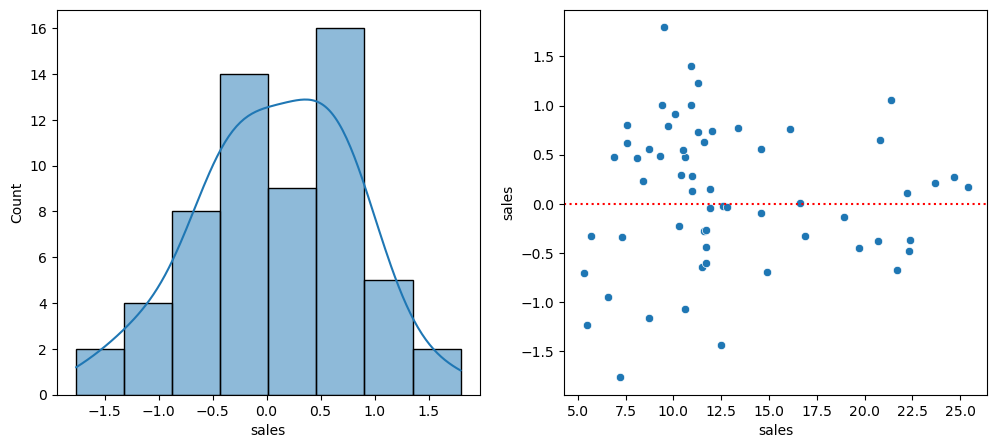

In [6]:
#Residual analysis
residuals = y_test - y_pred
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(residuals, kde=True, ax=ax[0])
sns.scatterplot(x=y_test, y=residuals, ax=ax[1])
plt.axhline(0, color='red', ls=':')

In [7]:
#Look at new features
columns = converter.get_feature_names_out(input_features=X.columns)
df_poly = pd.DataFrame(X_poly, columns=columns)
df_poly.head()

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [9]:
poly_model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [ ]:
=